###IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

random_state = 23
test_size = 0.2
n_splits=10

###Import dan Eksplorasi Data


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/febbisena/DataMining/refs/heads/main/microcalcification.csv')
df.head()

,Area,Grey Level,Gradient Strength,Noise Fluctuation,Contrast,Shape Descriptor,Microcalcification
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                11183 non-null  float64
 1   Grey Level          11183 non-null  float64
 2   Gradient Strength   11183 non-null  float64
 3   Noise Fluctuation   11183 non-null  float64
 4   Contrast            11183 non-null  float64
 5   Shape Descriptor    11183 non-null  float64
 6   Microcalcification  11183 non-null  object 
dtypes: float64(6), object(1)
memory usage: 611.7+ KB


In [ ]:
df.isna().sum()

,0
Area,0
Grey Level,0
Gradient Strength,0
Noise Fluctuation,0
Contrast,0
Shape Descriptor,0
Microcalcification,0


In [ ]:
en = LabelEncoder()

df['Microcalcification'] = en.fit_transform(df['Microcalcification'])
print(pd.Series(en.classes_))

0    '-1'
1     '1'
dtype: object


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Microcalcification
0    10923
1      260
Name: count, dtype: int64


<Axes: ylabel='count'>

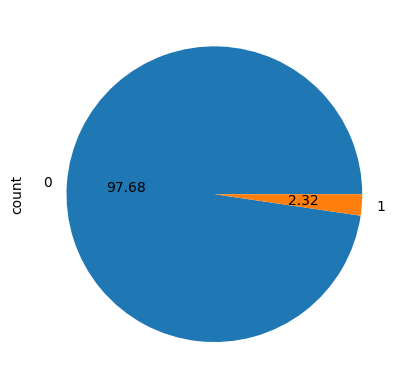

In [ ]:
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f')

###Imbalanced Data | Confusion Matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
model_1 = DecisionTreeClassifier(random_state=random_state)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [ ]:
y_pred_im = model_1.predict(X_test)

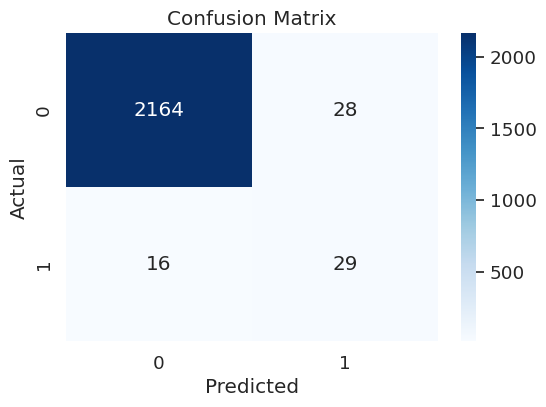

In [ ]:
cm_im = confusion_matrix(y_test, y_pred_im)

plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.heatmap(cm_im, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_im, digits=4))

              precision    recall  f1-score   support

           0     0.9927    0.9872    0.9899      2192
           1     0.5088    0.6444    0.5686        45

    accuracy                         0.9803      2237
   macro avg     0.7507    0.8158    0.7793      2237
weighted avg     0.9829    0.9803    0.9815      2237



In [ ]:
acc_1 = accuracy_score(y_test, y_pred_im)
f1_1 = f1_score(y_test, y_pred_im, average='macro')

print(f'Akurasi  : {acc_1 * 100:.2f}%')
print(f'F1-Score : {f1_1 * 100:.2f}%')

Akurasi  : 98.03%
F1-Score : 77.93%


###Imbalanced Data | K-Fold Cross Validation

In [ ]:
model_2 = DecisionTreeClassifier(random_state=random_state)

In [ ]:
kf_im = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro')
}

scores_im = cross_validate(model_2, X, y, cv=kf_im, scoring=scoring)

In [ ]:
acc_2 = scores_im['test_accuracy'].mean()
f1_2 = scores_im['test_f1'].mean()

print(f'Akurasi  : {acc_2 * 100:.2f}%')
print(f'F1-Score : {f1_2 * 100:.2f}%')

Akurasi  : 98.22%
F1-Score : 79.44%


###SMOTE | Confusion Matrix

In [ ]:
smote = SMOTE(random_state=random_state)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
df_res = pd.DataFrame(X_res, columns=X.columns)
df_res['Microcalcification'] = y_res

print(df_res.tail())

df_res.to_csv('dataset_smote.csv', index=False)

           Area  Grey Level  Gradient Strength  Noise Fluctuation  Contrast  \
21841 -0.011387   -0.382706          -0.220963           1.515597  1.304946   
21842  2.203883    0.469704          -0.464992          -0.859553 -0.377866   
21843  0.230182   -0.152839          -0.418301           1.488906 -0.377866   
21844  0.367675    0.015266          -0.501468           1.578864  7.750705   
21845  0.546004   -0.080488          -0.501468           1.647618  5.327604   

       Shape Descriptor  Microcalcification  
21841          1.399869                   1  
21842         -0.945723                   1  
21843          1.518309                   1  
21844          1.527354                   1  
21845          1.593125                   1  


Microcalcification
0    10923
1    10923
Name: count, dtype: int64


<Axes: ylabel='count'>

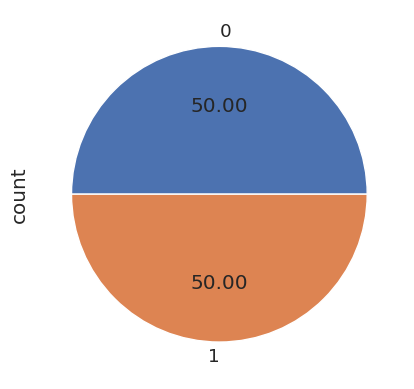

In [ ]:
print(y_res.value_counts())
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=test_size, random_state=random_state)

In [ ]:
model_3 = DecisionTreeClassifier(random_state=random_state)

In [ ]:
model_3.fit(X_res_train, y_res_train)

DecisionTreeClassifier(random_state=23)

In [ ]:
y_pred_sm = model_3.predict(X_res_test)

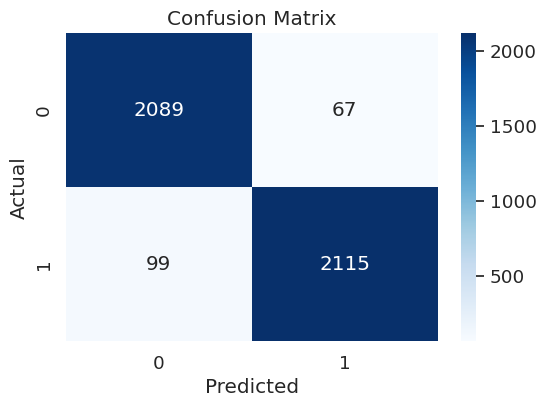

In [ ]:
cm_sm = confusion_matrix(y_res_test, y_pred_sm)

plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_res_test, y_pred_sm, digits=4))

              precision    recall  f1-score   support

           0     0.9548    0.9689    0.9618      2156
           1     0.9693    0.9553    0.9622      2214

    accuracy                         0.9620      4370
   macro avg     0.9620    0.9621    0.9620      4370
weighted avg     0.9621    0.9620    0.9620      4370



In [ ]:
acc_3 = accuracy_score(y_res_test, y_pred_sm)
f1_3 = f1_score(y_res_test, y_pred_sm, average='macro')

print(f'Akurasi  : {acc_3 * 100:.2f}%')
print(f'F1-Score : {f1_3 * 100:.2f}%')

Akurasi  : 96.20%
F1-Score : 96.20%


###SMOTE | K-Fold Cross Validation

In [ ]:
model_4 = DecisionTreeClassifier(random_state=random_state)

In [ ]:
kf_sm = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
scores_sm = cross_validate(model_4, X_res, y_res, cv=kf_sm, scoring=scoring)

In [ ]:
acc_4 = scores_sm['test_accuracy'].mean()
f1_4 = scores_sm['test_f1'].mean()

print(f'Akurasi  : {acc_4 * 100:.2f}%')
print(f'F1-Score : {f1_4 * 100:.2f}%')

Akurasi  : 96.79%
F1-Score : 96.79%


In [ ]:
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Dataset': ['Imbalanced', 'Imbalanced', 'SMOTE', 'SMOTE'],
    'Evaluasi': ['Confusion Matrix', 'K-Fold Cross Validation', 'Confusion Matrix', 'K-Fold Cross Validation'],
    'Akurasi (%)': [acc_1 * 100, acc_2 * 100, acc_3 * 100, acc_4 * 100],
    'F1-Score (%)': [f1_1 * 100, f1_2 * 100, f1_3 * 100, f1_4 * 100]
}

df_results = pd.DataFrame(data)
print(df_results)

     Model     Dataset                 Evaluasi  Akurasi (%)  F1-Score (%)
0  Model 1  Imbalanced         Confusion Matrix    98.033080     77.928170
1  Model 2  Imbalanced  K-Fold Cross Validation    98.220467     79.435965
2  Model 3       SMOTE         Confusion Matrix    96.201373     96.201239
3  Model 4       SMOTE  K-Fold Cross Validation    96.786557     96.785265


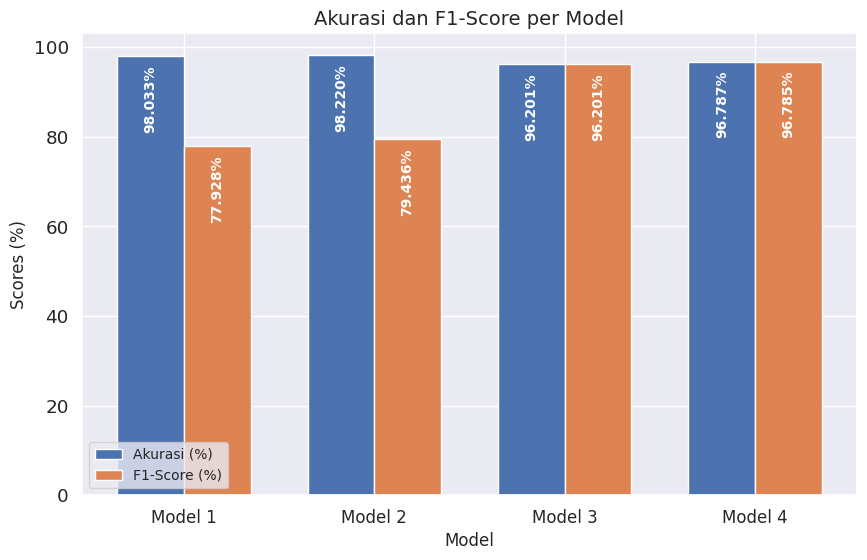

In [ ]:
x = np.arange(len(df_results['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, df_results['Akurasi (%)'], width, label='Akurasi (%)')
bars2 = ax.bar(x + width/2, df_results['F1-Score (%)'], width, label='F1-Score (%)')

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, f'{bar.get_height():.3f}%',
            ha='center', va='top', color='white', fontweight='bold', rotation=90, fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, f'{bar.get_height():.3f}%',
            ha='center', va='top', color='white', fontweight='bold', rotation=90, fontsize=10)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Scores (%)', fontsize=12)
ax.set_title('Akurasi dan F1-Score per Model', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_results['Model'], fontsize=12)
ax.legend(fontsize=10, loc='lower left')

plt.show()